In [1]:
import numpy as np
from sklearn.datasets import load_digits

# You know
There is the real reason why we are using K means... Now let's try out it's unsupervisedry.

In [5]:
X = load_digits()['data']
y = load_digits()['target']

In [7]:
X.shape

(1797, 64)

In [8]:
from sklearn.cluster import KMeans

In [38]:
model = KMeans(n_clusters=10)

In [39]:
model.fit(X)

KMeans(n_clusters=10)

In [40]:
output = model.cluster_centers_
output.shape

(10, 64)

In [48]:
output = output.reshape(10, 8, 8)

In [41]:
import matplotlib.pyplot as plt

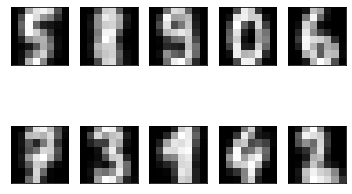

In [49]:
fig, axes = plt.subplots(2, 5)
axes = axes.ravel()
for i, img in enumerate(output):
    axes[i].set(xticks=[], yticks=[])
    axes[i].imshow(img, cmap= 'gray')

### See? 

# 

#### Addressing the mislables done by Unsupervised (random labels you know) 

In [43]:
from scipy.stats import mode

In [70]:
predict = model.predict(X)

In [71]:
labels = np.zeros_like(predict)

In [73]:
labels.shape

(1797,)

In [74]:
mask = (predict == 0)

In [78]:
labels[mask]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [85]:
y[mask]

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 9, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 5, 5, 7, 5, 7, 7,
       5, 5, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 9, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 8, 8, 5, 5, 5, 8, 5, 1, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 8, 8, 5, 5, 5, 8,
       5, 5, 5, 9, 9, 5, 5, 5, 5, 5, 5, 5, 9, 9, 5, 5, 3, 5, 5, 5, 5, 5,
       5, 3, 5])

In [84]:
mode(y[mask])

ModeResult(mode=array([5]), count=array([137]))

In [82]:
labels[mask] = mode(y[mask])[0]

In [88]:
labels = np.zeros_like(predict)
for i in range(10):
    mask = (predict == i)
    labels[mask] = mode(y[mask])[0]

In [89]:
from sklearn.metrics import accuracy_score

In [90]:
accuracy_score(y, labels)

0.7918753478018921

## 

# Doing the same with TSNE 

In [91]:
from sklearn.manifold import TSNE

In [92]:
tsne = TSNE(n_components= 2, init= 'pca')

In [94]:
trans = tsne.fit_transform(X)
trans

array([[ -3.7746797,  59.259594 ],
       [ 29.215488 , -16.224022 ],
       [ 19.422575 ,  -7.435363 ],
       ...,
       [ 11.466279 , -13.05509  ],
       [-16.275    ,  26.557718 ],
       [  7.342468 ,  -9.219007 ]], dtype=float32)

In [95]:
trans.shape

(1797, 2)

In [111]:
model = KMeans(n_clusters= 10)

In [112]:
model.fit(trans)

KMeans(n_clusters=10)

In [125]:
predict = model.predict(trans)

labels = np.zeros_like(predict)
for i in range(10):
    mask = (predict == i)
    labels[mask] = mode(y[mask])[0]

In [127]:
accuracy_score(y, labels)

0.9437952142459655

## Isn't it WOW! 